In [1]:
import os
import numpy as np
import pandas as pd
from glob import glob
from datetime import datetime
import scipy as sp
import scipy.optimize as op
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
%matplotlib inline

In [27]:
start = np.loadtxt("data_start.dat")

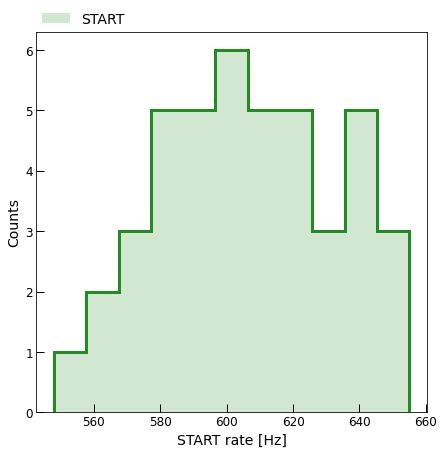

In [28]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.hist(start, fc='forestgreen', alpha=0.2, label='START', bins=11)
ax.hist(start, histtype='step', ec='forestgreen', lw=3, bins=11)

# ticks
ax.tick_params(which='major', right=False, width=1.0, length=8, direction="in", labelsize=12)
ax.tick_params(which='minor', right=False, width=1.0, length=4, direction="in", labelsize=12)
ax.xaxis.set_minor_locator(AutoMinorLocator(0.1))
ax.yaxis.set_minor_locator(AutoMinorLocator(0.25))

# labels
ax.set_xlabel("START rate [Hz]", fontsize=14)
ax.set_ylabel("Counts", fontsize=14)

# legend
ax.legend(loc=(0, 1), frameon=False, fontsize=14)